#### Import Libraries & Data

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("train.csv", sep="|", index_col='sfid')

#### Explore Data

In [6]:
df.columns

Index(['dt_rif', 'juridical_form', 'dossier_type', 'application_source',
       'credimi_industry', 'region', 'zone', 'revenues', 'pfn_ebitda', 'pn',
       'ebitda', 'target', 'score_accounting', 'score_identity', 'score_trend',
       'slope_ebit', 'slope_fondi', 'slope_ebitda', 'slope_fatturato',
       'slope_liquidita', 'slope_al_accordato_operativo_sistema',
       'slope_al_utilizzo_sistema', 'slope_al_sconfino_sistema',
       'slope_scad_accordato_operativo_sistema', 'slope_scad_utilizzo_sistema',
       'slope_scad_sconfino_sistema', 'slope_rev_accordato_operativo_sistema',
       'slope_rev_utilizzo_sistema', 'slope_rev_sconfino_sistema', 'gender'],
      dtype='object')

In [7]:
df.head()

,dt_rif,juridical_form,dossier_type,application_source,credimi_industry,region,zone,revenues,pfn_ebitda,pn,ebitda,target,score_accounting,score_identity,score_trend,slope_ebit,slope_fondi,slope_ebitda,slope_fatturato,slope_liquidita,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema,gender
sfid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a1Q7R00000eiXcbUAE,2021-10-07,SN,F,D,FOOD_AND_BEVERAGES,LIGURIA,N-W,NaN,NaN,NaN,NaN,0.0,-0.161538,-0.590619,-0.8,20.612502,0.715983,-1.355261,133.807545,15.753695,-0.427516,1.155419,0.000000,0.087516,-0.340000,0.000000,0.000000,-0.006677,0.508290,M
a1Q2X00000ZARoVUAX,2020-03-24,RS,S,D,SERVICES,LAZIO,C,132.0,-1.6670,54.0,63.0,0.0,-2.746130,-0.430867,0.1,6.189476,-16.101876,4.337416,149.375393,13.998235,-25.381809,7.030049,-22.233850,-5.869132,3.402050,3.075468,21.674122,-10.247544,-3.023080,M
a1Q7R00000ZWIfjUAH,2020-11-05,SR,F,D,CONSTRUCTION,LAZIO,C,NaN,NaN,NaN,NaN,1.0,-0.161538,-0.789303,0.1,24.669114,-5.456726,18.741142,157.938385,22.948975,1.523189,-15.882350,12.401150,11.530694,6.835563,4.499724,19.697716,2.123602,-15.979714,F
a1Q2X00000ZEZZlUAP,2020-05-18,SR,F,D,MECHANICS,VENETO,N-E,3913.0,0.4693,297.0,179.0,0.0,-1.779492,-2.654802,-3.0,53.500000,0.000000,53.500000,85.500000,-1.000000,5.506611,1.736408,-2.902523,-2.798806,-6.996783,5.972703,14.811891,13.726678,-6.910094,M
a1Q7R00000eiTipUAE,2021-09-24,SR,F,D,AGRICOLTURE,LOMBARDIA,N-W,1066.0,1.5030,478.0,181.0,0.0,-1.133708,-2.655170,0.3,-2.027899,-3.447049,-2.012893,161.879903,22.998430,13.376804,18.034658,1.379611,-1.782299,-16.781079,6.831352,-1.187466,10.233442,4.382520,M


In [8]:
df.shape

(7520, 30)

In [9]:
df.groupby('target').size()

target
0.0    6406
1.0    1114
dtype: int64

In [10]:
cols_cat = list(df.select_dtypes(exclude='number').columns)
cols_cat.remove('dt_rif')
cols_num = list(df.select_dtypes(include='number').columns)
cols_num.remove('target')

In [11]:
df.isna().sum().sort_values(ascending=False)

pfn_ebitda                                2582
pn                                        2578
revenues                                  2578
ebitda                                    2578
score_accounting                             8
credimi_industry                             8
score_trend                                  8
score_identity                               8
slope_al_utilizzo_sistema                    0
slope_al_sconfino_sistema                    0
slope_scad_accordato_operativo_sistema       0
dt_rif                                       0
slope_scad_utilizzo_sistema                  0
slope_liquidita                              0
slope_scad_sconfino_sistema                  0
slope_rev_accordato_operativo_sistema        0
slope_rev_utilizzo_sistema                   0
slope_rev_sconfino_sistema                   0
slope_al_accordato_operativo_sistema         0
slope_ebit                                   0
slope_fatturato                              0
slope_ebitda 

In [12]:
df[df['credimi_industry'].isna()]

,dt_rif,juridical_form,dossier_type,application_source,credimi_industry,region,zone,revenues,pfn_ebitda,pn,ebitda,target,score_accounting,score_identity,score_trend,slope_ebit,slope_fondi,slope_ebitda,slope_fatturato,slope_liquidita,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema,gender
sfid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a1Q2X00000XbvN8UAJ,2020-01-21,DI,D,D,NaN,LOMBARDIA,N-W,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-14.642266,2.436758,-9.849405,150.730033,5.602377,4.303062,-0.382120,-2.882515,-4.205421,-2.152031,-20.206429,20.295000,15.293084,0.541181,M
a1Q2X00000ZWCsSUAX,2020-09-15,SR,F,R,NaN,EMILIA-ROMAGNA,N-E,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,14.647948,4.106567,8.653373,148.039784,15.295972,-10.668206,-2.361433,-3.106066,8.379423,0.202955,7.404632,-27.547388,-6.394759,11.881781,F
a1Q2X00000ZEWhqUAH,2020-05-26,DI,L,P,NaN,PUGLIA,S,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-0.070344,-18.093873,16.529924,148.490984,12.035528,4.794689,-13.562743,-14.105639,1.389623,-0.276479,-8.869713,-19.228855,7.007513,11.883730,M
a1Q2X00000ZEZdxUAH,2020-05-14,SR,F,D,NaN,TOSCANA,C,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,14.446694,-3.921690,-3.086269,145.611949,14.374166,-1.889246,-2.467044,-14.186222,-2.524246,0.474890,1.803996,-7.820765,-3.537717,2.476418,M
a1Q2X00000ZEXYBUA5,2020-06-22,DI,L,P,NaN,LOMBARDIA,N-W,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-6.925976,-19.509481,-10.074241,156.998316,11.469785,5.881613,-0.889628,-1.286629,5.501697,4.407480,-16.780010,10.365140,13.600096,-2.520613,M
a1Q2X00000ZEbemUAD,2020-05-22,SR,F,D,NaN,LOMBARDIA,N-W,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,11.245214,-10.324696,18.144791,132.104645,23.538876,-14.660015,-9.729767,-13.507246,-14.669159,5.963042,0.607521,2.576483,-4.378538,5.605153,F
a1Q2X00000ZBRYeUAP,2020-04-16,SU,S,D,NaN,PIEMONTE,N-W,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.070651,-2.809355,6.921008,117.481472,21.931080,-20.644002,-3.417542,3.570730,14.699341,-8.453389,-3.820932,0.783168,5.055376,-1.645748,M
a1Q2X00000Xbr7xUAB,2020-01-20,SR,D,D,NaN,LOMBARDIA,N-W,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.015459,14.469446,11.349834,125.194237,6.699196,2.110984,-20.511831,-8.314299,-8.091509,-12.072245,12.350605,-6.874049,8.701730,-3.297167,F


#### Missing Values

In [13]:
cols_NaN_1 = ['revenues', 'pfn_ebitda', 'pn', 'ebitda']
cols_NaN_2 = ['credimi_industry', 'score_accounting', 'score_identity', 'score_trend']

In [14]:
# Drop rows with missing values in columns cols_NaN_2, rationale: few entries
df.dropna(subset = cols_NaN_2, inplace=True)

In [15]:
# Fill the missing values in columns cols_NaN_1, rationale: over 1/3 of entries
df['is_NaN_1'] = df[cols_NaN_1].isna().sum(axis=1).apply(lambda x: 0 if x==0 else 1)

In [16]:
my_imputer = SimpleImputer(strategy = 'median')
df[cols_NaN_1] = my_imputer.fit_transform(df[cols_NaN_1])

#### New Features

In [17]:
df['_feat_1'] = df['pn'] + df['slope_fondi'] + df['slope_ebitda'] - df['slope_ebit']
df['_feat_2'] = df['pn'] - ( df['pfn_ebitda'] * df['ebitda'] )

#### Correlations

In [18]:
abs(df.corr()['target']).sort_values(ascending=False)
vars = list(abs(df.corr()['target']).sort_values(ascending=False)[1:11].index)

<AxesSubplot:>

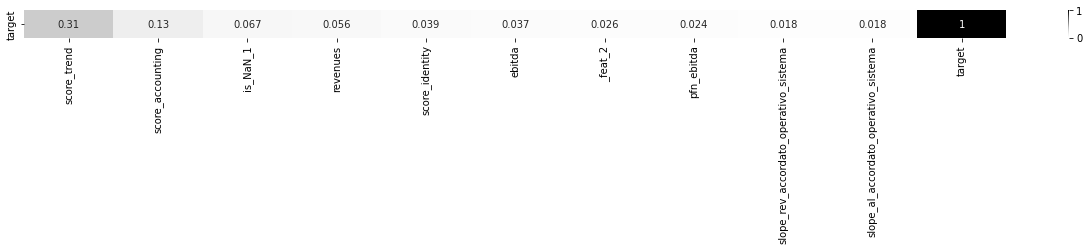

In [19]:
plt.figure(figsize=(22,0.5))
sns.heatmap(abs(df[vars + ['target']].corr()['target':]), cmap='Greys', annot=True, vmax=1, vmin=0)

#### Scaling

In [20]:
cols_num += ['_feat_1', '_feat_2']

In [21]:
df[cols_num].describe().round(3)

,revenues,pfn_ebitda,pn,ebitda,score_accounting,score_identity,score_trend,slope_ebit,slope_fondi,slope_ebitda,slope_fatturato,slope_liquidita,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema,_feat_1,_feat_2
count,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000
mean,1988.479,0.382,314.662,131.201,-1.607,-1.325,-0.697,4.736,-4.821,5.715,141.670,12.537,0.252,-0.070,-0.010,-0.041,0.464,0.035,0.118,-0.076,0.154,310.821,127.471
std,4113.766,8.101,940.689,294.437,2.291,0.619,1.011,71.938,25.269,72.058,370.565,42.782,10.008,9.826,9.837,9.842,9.957,9.981,9.914,9.836,9.908,940.341,785.026
min,0.000,-386.300,-5436.000,-8084.000,-9.560,-2.809,-3.000,-4579.000,-1212.000,-4299.000,-10465.000,-572.000,-37.639,-38.575,-37.075,-41.646,-38.511,-38.316,-42.767,-36.374,-34.974,-5446.042,-15473.321
25%,673.750,-0.323,80.000,45.000,-1.478,-1.748,-1.100,-2.000,-10.540,-1.306,131.943,3.000,-6.205,-6.705,-6.589,-6.536,-6.091,-6.687,-6.408,-6.714,-6.261,75.763,45.000
50%,1033.000,-0.095,120.000,68.000,-1.027,-1.298,-0.750,4.782,-3.788,5.940,141.379,10.765,0.262,0.000,0.000,-0.016,0.120,0.000,0.000,-0.047,0.000,117.041,126.476
75%,1529.500,0.135,197.000,103.000,-0.162,-0.868,0.100,12.317,1.002,13.605,149.691,18.668,6.739,6.544,6.582,6.354,7.051,6.819,6.755,6.488,6.742,193.344,140.000
max,117000.000,313.500,28170.000,7126.000,1.086,0.110,0.800,1391.500,569.000,1522.500,12325.000,1556.500,36.497,35.249,42.276,41.043,36.244,39.881,41.496,41.768,39.755,28156.766,24483.621


In [22]:
my_scaler = preprocessing.PowerTransformer()
df_scaled = pd.DataFrame()
df_scaled[cols_num] = my_scaler.fit_transform(df[cols_num])
df_scaled.index = df.index

In [23]:
df_scaled.describe().round(3)

,revenues,pfn_ebitda,pn,ebitda,score_accounting,score_identity,score_trend,slope_ebit,slope_fondi,slope_ebitda,slope_fatturato,slope_liquidita,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema,_feat_1,_feat_2
count,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000,7512.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-4.850,-42.515,-37.017,-33.049,-1.944,-2.232,-1.738,-41.291,-37.371,-39.199,-24.930,-19.910,-3.763,-3.904,-3.746,-4.214,-3.975,-3.825,-4.314,-3.716,-3.532,-37.335,-16.444
25%,-0.420,-0.098,-0.261,-0.287,-0.564,-0.703,-0.631,-0.167,-0.269,-0.165,-0.034,-0.199,-0.647,-0.676,-0.670,-0.661,-0.655,-0.674,-0.659,-0.674,-0.648,-0.259,-0.137
50%,-0.041,-0.070,-0.203,-0.208,-0.218,0.001,-0.324,-0.050,0.001,-0.044,-0.009,-0.011,-0.003,0.005,-0.002,0.001,-0.026,-0.006,-0.013,0.007,-0.018,-0.198,-0.030
75%,0.318,-0.041,-0.096,-0.089,1.085,0.716,0.771,0.097,0.211,0.097,0.014,0.173,0.647,0.672,0.669,0.649,0.664,0.679,0.669,0.669,0.664,-0.093,-0.012
max,5.132,44.059,22.954,22.689,9.410,2.584,2.393,37.745,36.962,37.519,34.681,30.403,3.644,3.608,4.327,4.189,3.544,4.011,4.185,4.223,4.013,22.762,34.753


#### Model

In [24]:
x = pd.concat([df_scaled, df[cols_cat], df['is_NaN_1']], axis=1)
y = df['target']

In [25]:
x.columns

Index(['revenues', 'pfn_ebitda', 'pn', 'ebitda', 'score_accounting',
       'score_identity', 'score_trend', 'slope_ebit', 'slope_fondi',
       'slope_ebitda', 'slope_fatturato', 'slope_liquidita',
       'slope_al_accordato_operativo_sistema', 'slope_al_utilizzo_sistema',
       'slope_al_sconfino_sistema', 'slope_scad_accordato_operativo_sistema',
       'slope_scad_utilizzo_sistema', 'slope_scad_sconfino_sistema',
       'slope_rev_accordato_operativo_sistema', 'slope_rev_utilizzo_sistema',
       'slope_rev_sconfino_sistema', '_feat_1', '_feat_2', 'juridical_form',
       'dossier_type', 'application_source', 'credimi_industry', 'region',
       'zone', 'gender', 'is_NaN_1'],
      dtype='object')

In [26]:
for cat in cols_cat:
    x[cat] = pd.Series(x[cat], dtype="category")

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [298]:
my_params = {'learning_rate': 0.1,
              'n_estimators': 1000,
              'max_depth': 3,
              'num_leaves': 3,
              'random_state': 42,
              'is_unbalance': True }

In [299]:
my_model = lgbm.LGBMClassifier(**my_params)
my_model.fit(x_train, y_train,eval_set=[(x_test, y_test), (x_train, y_train)], eval_metric='logloss', verbose=False)

LGBMClassifier(is_unbalance=True, max_depth=3, n_estimators=1000, num_leaves=3,
               random_state=42)

In [300]:
print('Training accuracy {:.4f}'.format(my_model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(my_model.score(x_test,y_test)))

Training accuracy 0.9401
Testing accuracy 0.8982


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

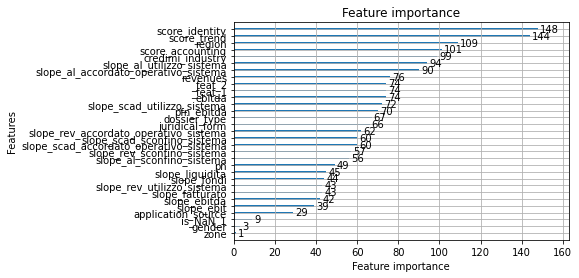

In [301]:
lgbm.plot_importance(my_model)

#### Results

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

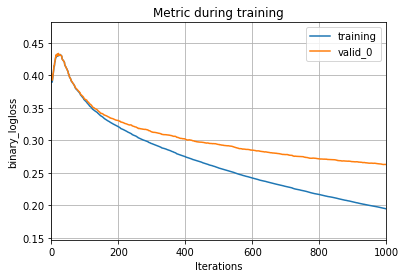

In [302]:
lgbm.plot_metric(my_model)

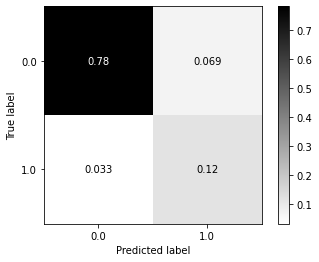

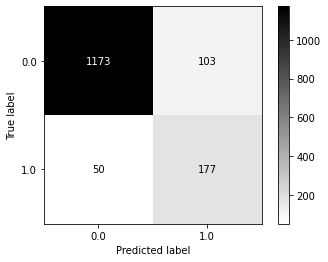

In [303]:
confusion_matrix = metrics.plot_confusion_matrix(my_model, x_test, y_test, normalize='all', cmap='binary')
cm = metrics.plot_confusion_matrix(my_model, x_test, y_test, cmap='binary').text_

In [304]:
profit = {'tn': 3000, 'fp': -3000, 'fn': -50000, 'tp': 0}
confusion = {'tn': int(cm[0,0].get_text()), 'fp': int(cm[0,1].get_text()), 'fn': int(cm[1,0].get_text()), 'tp': int(cm[1,1].get_text())}

In [305]:
total_profit = 0
for key in profit.keys():
    total_profit += profit[key]*confusion[key]

In [306]:
print('{:,}'.format(total_profit))

710,000


#### Re-train Model

In [307]:
my_model.fit(x, y)

LGBMClassifier(is_unbalance=True, max_depth=3, n_estimators=1000, num_leaves=3,
               random_state=42)

#### Prediction

In [308]:
df_test = pd.read_csv("test.csv", sep="|", index_col='sfid')

In [309]:
df_test.shape

(1880, 29)

In [310]:
df_test.isna().sum().sort_values(ascending=False)

pfn_ebitda                                682
pn                                        681
revenues                                  681
ebitda                                    681
score_accounting                            2
credimi_industry                            2
score_trend                                 2
score_identity                              2
slope_al_sconfino_sistema                   0
slope_scad_accordato_operativo_sistema      0
slope_scad_utilizzo_sistema                 0
dt_rif                                      0
slope_al_accordato_operativo_sistema        0
slope_scad_sconfino_sistema                 0
slope_rev_accordato_operativo_sistema       0
slope_rev_utilizzo_sistema                  0
slope_rev_sconfino_sistema                  0
slope_al_utilizzo_sistema                   0
slope_ebit                                  0
slope_liquidita                             0
slope_fatturato                             0
slope_ebitda                      

In [311]:
df_test_NaN_2 = df_test[df_test['credimi_industry'].isna()]
df_test.dropna(subset = cols_NaN_2, inplace=True)

In [312]:
df_test['is_NaN_1'] = df_test[cols_NaN_1].isna().sum(axis=1).apply(lambda x: 0 if x==0 else 1)

In [313]:
df_test[cols_NaN_1] = my_imputer.transform(df_test[cols_NaN_1])

In [314]:
df_test['_feat_1'] = df_test['pn'] + df_test['slope_fondi'] + df_test['slope_ebitda'] - df_test['slope_ebit']
df_test['_feat_2'] = df_test['pn'] - ( df_test['pfn_ebitda'] * df_test['ebitda'] )

In [315]:
df_test.shape

(1878, 32)

In [316]:
df_test_scaled = pd.DataFrame()
df_test_scaled[cols_num] = my_scaler.transform(df_test[cols_num])
df_test_scaled.index = df_test.index

In [317]:
df_test_scaled.shape

(1878, 23)

In [318]:
x_df_test = pd.concat([df_test_scaled, df_test[cols_cat], df_test['is_NaN_1']], axis=1)

In [319]:
x_df_test.shape

(1878, 31)

In [320]:
for cat in cols_cat:
    x_df_test[cat] = pd.Series(x_df_test[cat], dtype="category")

In [321]:
y_df_test = my_model.predict(x_df_test)

In [322]:
y_submission = pd.DataFrame(y_df_test, index=x_df_test.index, columns=['target'])

In [323]:
y_submission.shape

(1878, 1)

In [324]:
df_test_NaN_2['target'] = 1.0

In [325]:
y_csv = pd.DataFrame()
y_csv['label'] = y_submission.append(pd.DataFrame(df_test_NaN_2['target']))

In [326]:
y_csv

,label
sfid,
a1Q2X00000XcAcwUAF,1.0
a1Q7R00000ZWGilUAH,0.0
a1Q2X00000XcXBUUA3,1.0
a1Q7R00000a3GGvUAM,0.0
a1Q7R00000ZWWU5UAP,0.0
...,...
a1Q2X00000Xc3fGUAR,0.0
a1Q7R00000eiZYRUA2,1.0
a1Q7R00000ejTXLUA2,1.0


In [327]:
y_csv.to_csv('sub6.csv', sep="|")